In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm 
import statsmodels.api as sm2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Week 2\car.csv")

In [3]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


## Data Cleaning

In [4]:
df.shape

(398, 8)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:
df['Model Year'] = str(19) + df['Model Year'].astype(str)
df['Model Year'].astype(int)
df['Model Year'] = pd.to_datetime(df['Model Year'])
df['Model Year']= df['Model Year'].dt.year

In [7]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,1970,1
1,15.0,8,350.0,165,3693,11.5,1970,1
2,18.0,8,318.0,150,3436,11.0,1970,1
3,16.0,8,304.0,150,3433,12.0,1970,1
4,17.0,8,302.0,140,3449,10.5,1970,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,1982,1
394,44.0,4,97.0,52,2130,24.6,1982,0
395,32.0,4,135.0,84,2295,11.6,1982,1
396,28.0,4,120.0,79,2625,18.6,1982,1


In [8]:
for col in df:
    print(df[col].unique())

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
[8 4 6 3 5]
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  10

In [9]:
df=df.replace("?",np.nan)

In [10]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [11]:
df["Horsepower"]=df["Horsepower"].astype(float)
df["Horsepower"].fillna(df["Horsepower"].mean(),inplace=True)
df["Horsepower"]=df["Horsepower"].astype('int64')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int64  
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


In [12]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

## Exploratory Data Analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.462312,38.199230,46.0,76.000,95.0,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,1976.010050,3.697627,1970.0,1973.000,1976.0,1979.000,1982.0
US Made,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0


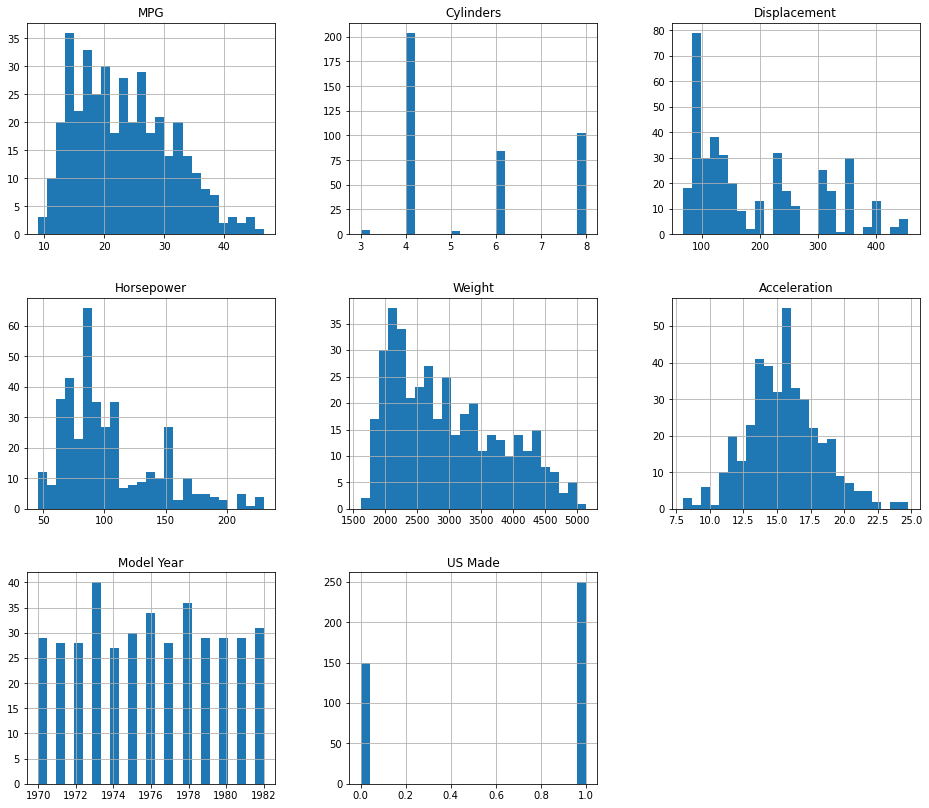

In [14]:
df.hist(figsize=(16,14),bins=25);

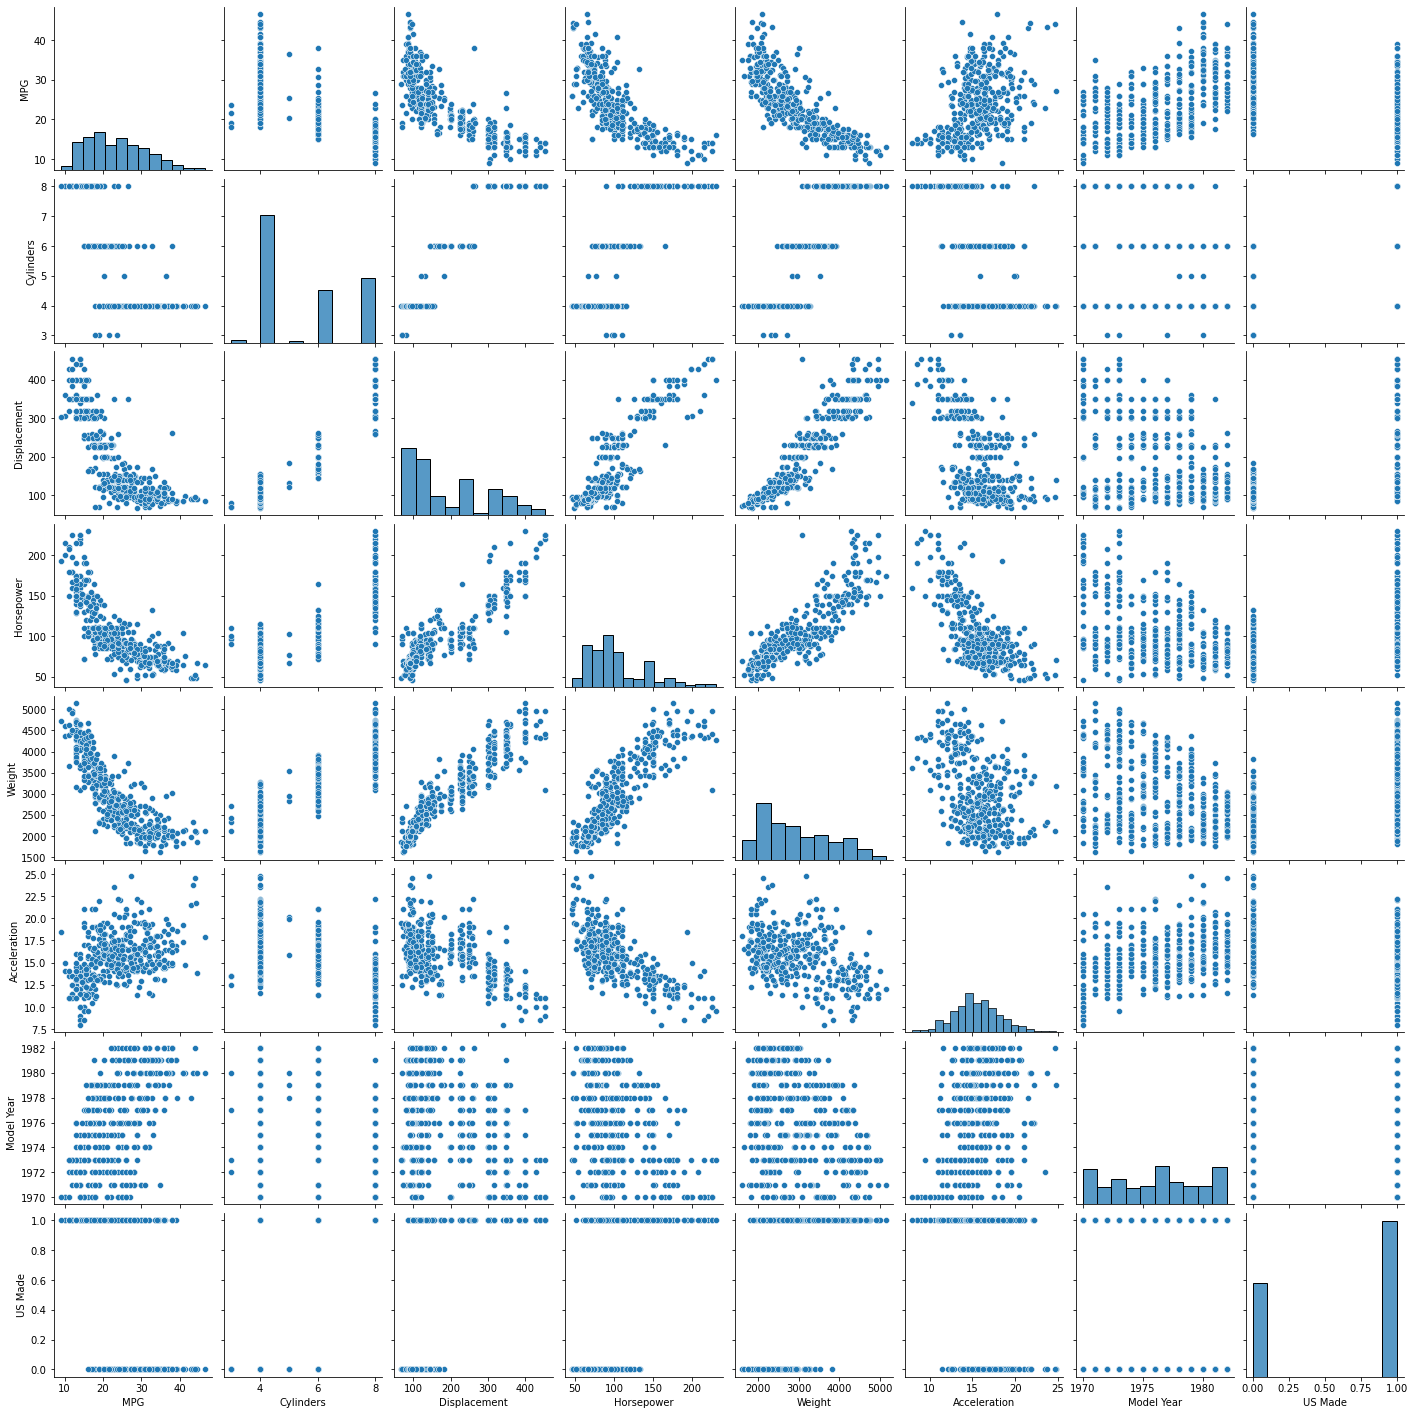

In [15]:
sns.pairplot(df)

<AxesSubplot:>

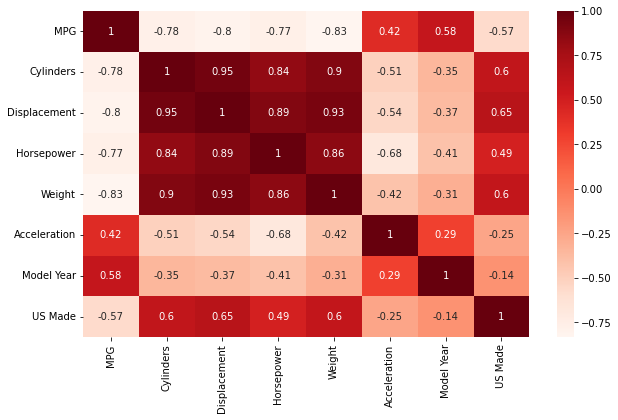

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

In [17]:
X_variable = df[['Cylinders','Displacement','Horsepower','Weight','Acceleration','US Made']]

In [18]:
X_variable = sm.tools.add_constant(X_variable) 
VIF = pd.Series([variance_inflation_factor(X_variable.values,i) for i in range(X_variable.shape[1])],
                  index=X_variable.columns)

In [19]:
VIF

const           152.783051
Cylinders        10.671192
Displacement     22.614861
Horsepower        8.713276
Weight           10.153619
Acceleration      2.495750
US Made           1.903938
dtype: float64

In [20]:
X_variable1 = df[['Acceleration','US Made','Horsepower']]

In [21]:
X_variable1 = sm.tools.add_constant(X_variable1) 
VIF1 = pd.Series([variance_inflation_factor(X_variable1.values,i) for i in range(X_variable1.shape[1])],
                  index=X_variable1.columns)

In [22]:
VIF1

const           116.955852
Acceleration      1.912565
US Made           1.331313
Horsepower        2.346689
dtype: float64

## Linear Regression Modeling

In [23]:
df=pd.concat([df,pd.get_dummies(df['Model Year'],prefix='MY')],axis=1)
df.drop('Model Year',axis=1,inplace=True)

In [24]:
X1 = df.drop(columns=['MPG','Cylinders','Displacement','Weight'])
y = df[['MPG']]

In [25]:
X_train1,X_test1,y_train,y_test = train_test_split(X1,y,test_size=.3,random_state=212)

In [26]:
X1_const1 = sm.tools.add_constant(X_train1)
X1_const2 = sm.tools.add_constant(X_test1)
model1 = sm2.OLS(y_train,X1_const1)
Lmodel1 = model1.fit()

In [27]:
print(Lmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     73.69
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           9.30e-85
Time:                        21:25:21   Log-Likelihood:                -730.93
No. Observations:                 278   AIC:                             1494.
Df Residuals:                     262   BIC:                             1552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3317      2.298     18.857   

In [28]:
X2 = df.drop(columns=['MPG','Cylinders','Displacement','Weight','MY_1972','MY_1973','MY_1974','MY_1975','MY_1976'])
X_train2,X_test2 = train_test_split(X2,test_size=.3,random_state=212)

In [29]:
X2_const1 = sm.tools.add_constant(X_train2)
X2_const2 = sm.tools.add_constant(X_test2)
model2 = sm2.OLS(y_train,X2_const1)
Lmodel2 = model2.fit()

In [30]:
print(Lmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           2.25e-88
Time:                        21:25:21   Log-Likelihood:                -731.72
No. Observations:                 278   AIC:                             1487.
Df Residuals:                     266   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.0754      2.497     17.649   

In [31]:
X3 = df.drop(columns=['MPG','Cylinders','Displacement','Weight','MY_1972','MY_1973','MY_1974','MY_1975','MY_1976','MY_1971'])
X_train3,X_test3 = train_test_split(X3,test_size=.3,random_state=212)

In [32]:
X3_const1 = sm.tools.add_constant(X_train3)
X3_const2 = sm.tools.add_constant(X_test3)
model3 = sm2.OLS(y_train,X3_const1)
Lmodel3 = model3.fit()

In [33]:
print(Lmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           5.71e-89
Time:                        21:25:21   Log-Likelihood:                -732.79
No. Observations:                 278   AIC:                             1488.
Df Residuals:                     267   BIC:                             1527.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.4569      2.488     17.870   

In [34]:
X4 = df.drop(columns=['MPG','Cylinders','Displacement','Weight','MY_1972','MY_1973','MY_1974','MY_1975','MY_1976','MY_1971','MY_1970'])
X_train4,X_test4 = train_test_split(X4,test_size=.3,random_state=212)

In [35]:
X4_const1 = sm.tools.add_constant(X_train4)
X4_const2 = sm.tools.add_constant(X_test4)
model4 = sm2.OLS(y_train,X4_const1)
Lmodel4 = model4.fit()

In [36]:
print(Lmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.15e-89
Time:                        21:25:21   Log-Likelihood:                -734.71
No. Observations:                 278   AIC:                             1489.
Df Residuals:                     268   BIC:                             1526.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.7501      2.496     17.930   

In [37]:
pred = Lmodel4.predict(X4_const2)

In [38]:
y_test = pd.DataFrame(y_test.values, columns = ['Actual MPG'])
pred = pd.DataFrame(pred.values, columns = ['Predicted MPG'])
df_final = pd.DataFrame({'Actual MPG':y_test.values.flatten(),
                    'Predicted MPG':pred.values.flatten()})

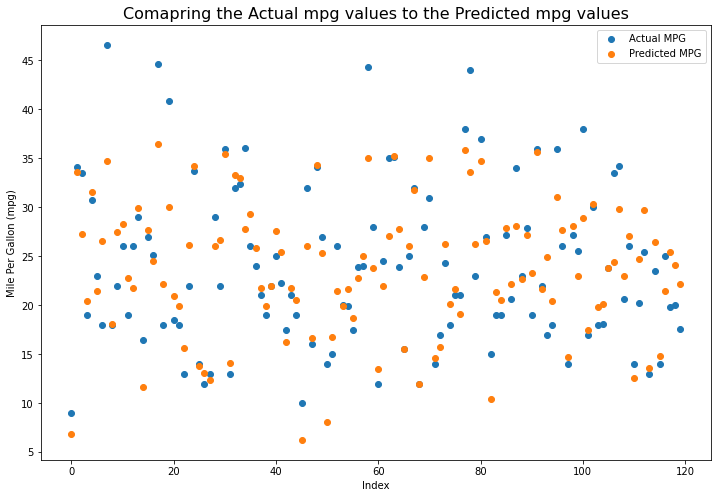

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(df_final.index,df_final['Actual MPG'].values,label='Actual MPG')
plt.scatter(df_final.index,df_final['Predicted MPG'].values,label='Predicted MPG')
plt.title('Comapring the Actual mpg values to the Predicted mpg values',
         fontsize=16)
plt.xlabel('Index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper right')
plt.show()